# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.mlab as mlab
import matplotlib

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")
north_df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


0            Complaint
1        Sales Support
2        Sales Support
3        Sales Support
4      Product Support
            ...       
240    Product Support
241    Product Support
242    Product Support
243    Product Support
244    Product Support
Name: Call Purpose, Length: 245, dtype: object

In [3]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [4]:
north_reps = north_df[['Rep ID']].drop_duplicates(subset=['Rep ID'])
#9
len(north_reps)
# north_rep_number = len(north_reps)

9

In [5]:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [6]:
#number of calls in each time block here
north_df[['Time Block','Calls']]
north_df['Time Block'].value_counts()
sorting_north_timeblocks = north_df['Time Block'].value_counts().sort_index(ascending=True)
sorting_north_timeblocks

10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [124]:
north_df['Lost Call'].value_counts()
5/240*100

2.083333333333333

In [125]:
south_df['Lost Call'].value_counts()
11/303*100

3.6303630363036308

In [7]:
south_reps = south_df[['Rep ID']].drop_duplicates(subset=['Rep ID'])
#11
len(south_reps)
# south_reps_number = len(south_reps)

11

In [8]:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

In [9]:
#number of calls in each time block here
south_df[['Time Block','Calls']]
south_df['Time Block'].value_counts()
sorting_south_timeblocks = south_df['Time Block'].value_counts().sort_index(ascending=True)
sorting_south_timeblocks

10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Time Block, dtype: int64

In [10]:
north_df[['Time Block','Calls']]
north_df['Time Block'].value_counts()
sorting_north_timeblocks = north_df['Time Block'].value_counts().sort_index(ascending=True)
sorting_north_timeblocks

10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [11]:
sorting_north_timeblocks

10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch? North = 9 and South = 11
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

NORTH
Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347

SOUTH
Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347

3. What is the number of calls taken for each time block?
COUTH
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5

NORTH
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [12]:
# Clean your data here
swt = south_df[south_df['Incoming Wait Time'].isna()]
print(swt.to_string())

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
126         126  South  Product Support    9:00 AM             Outgoing     C   Sandy   NO          1          0            12                  2                 NaN                      4      1
127         127  South  Product Support    9:00 AM             Outgoing     C   Susan   NO          1          0             9                  3                 NaN                      4      1
128         128  South  Product Support    9:00 AM             Outgoing     D    Karl   NO          1          0             9                  3                 NaN                      4      1
129         129  South    Sales Support   10:00 AM             Outgoing     C   Susan   NO          1          0             8                  2                 NaN                      4      1
130         130  Sou

In [13]:
nwt = north_df[north_df['Incoming Wait Time'].isna()]
print(nwt.to_string())

     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  Incoming Wait Time  During Call Wait Time  Calls
82           82  North    Sales Support   10:00 AM             Outgoing     A     Cam   NO          1          0             8                  1                 NaN                      2      1
83           83  North    Sales Support   10:00 AM             Outgoing     B    Duke   NO          1          0            10                  2                 NaN                      4      1
84           84  North    Sales Support   11:00 AM             Outgoing     B  Xander   NO          1          0            10                  1                 NaN                      4      1
85           85  North  Product Support    9:00 AM             Outgoing     B    Duke   NO          1          0            12                  1                 NaN                      2      1
86           86  Nor

<AxesSubplot:>

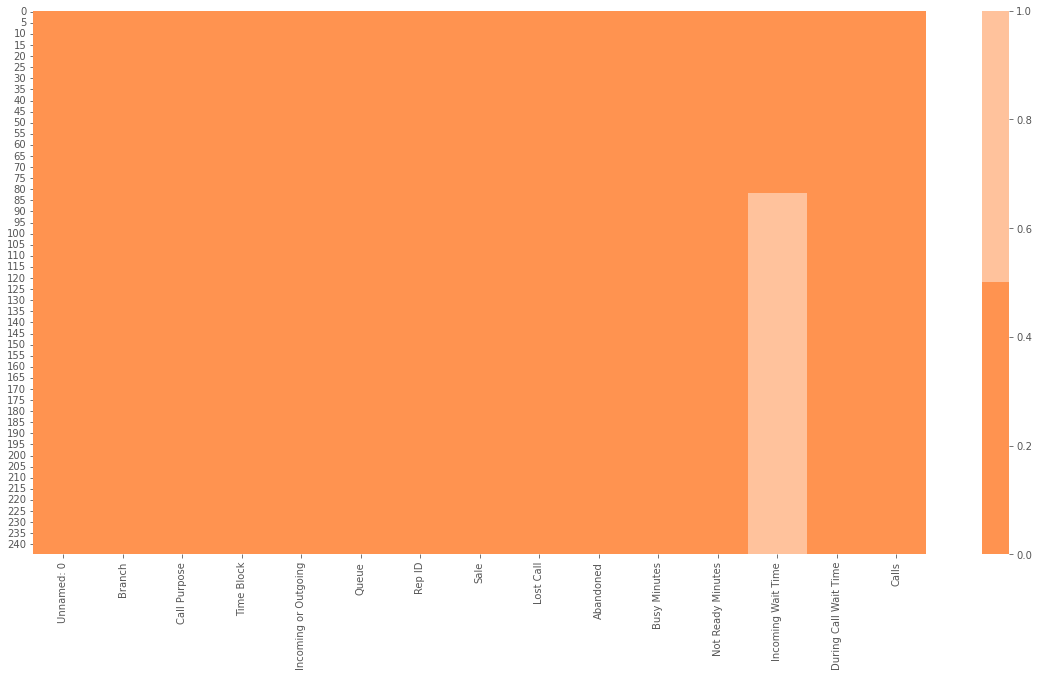

In [153]:
ncols = north_df.columns[:]
colors = ['#ff9350', '#FFC29C']
sns.heatmap(north_df[ncols].isnull(), cmap=sns.color_palette(colors))

In [161]:
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

In [162]:
south_df['Sale'].value_counts()

NO     308
YES      6
Name: Sale, dtype: int64

<AxesSubplot:>

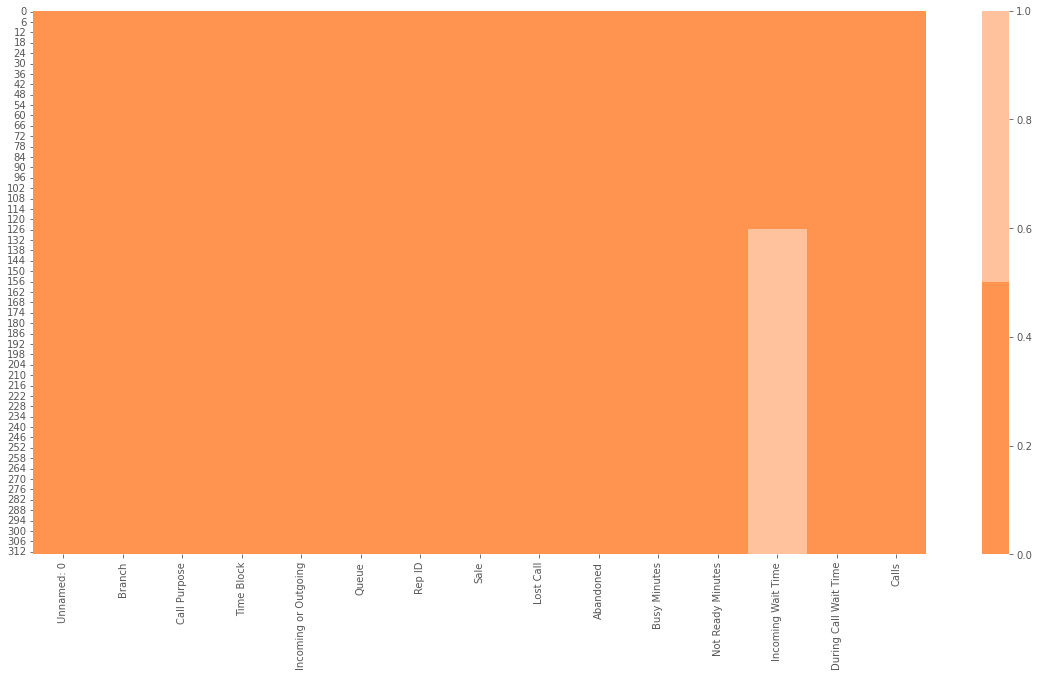

In [16]:
scols = south_df.columns[:]
colours = ['#ff9350', '#ffc29c']
sns.heatmap(south_df[scols].isnull(), cmap=sns.color_palette(colours))

In [17]:
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [18]:
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [19]:
north_df_dedupped = north_df.drop_duplicates()

# there were duplicate rows
print(north_df.shape)
print(north_df_dedupped.shape)

(245, 15)
(245, 15)


In [20]:
south_df_dedupped = south_df.drop_duplicates()

# there were duplicate rows
print(south_df.shape)
print(south_df_dedupped.shape)

(314, 15)
(314, 15)


In [21]:
num_rows = len(south_df.index)
low_information_cols = [] #

for col in south_df.columns:
    cnts = south_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    314
Name: Branch, dtype: int64

Sale: 98.08917%
NO     308
YES      6
Name: Sale, dtype: int64

Lost Call: 96.49682%
0    303
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.72611%
0    310
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    314
Name: Calls, dtype: int64



In [22]:
num_rows = len(north_df.index)
low_information_cols = [] #

for col in north_df.columns:
    cnts = north_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    245
Name: Branch, dtype: int64

Sale: 95.51020%
NO     234
YES     11
Name: Sale, dtype: int64

Lost Call: 97.95918%
0    240
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.14286%
0    238
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    245
Name: Calls, dtype: int64



### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? 
Yes!
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue? 
There was one row where the YES had a space behind the value, so I rectified this by using the strip syntax. This removes any white space throughout that entire column. I did this, as that space was leading to the column having 3 possible answers for the sale.
3. Are there duplicates in the two data sets? If there are, how did you handle them?
I did not find any duplicate items in either dataset.
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
Looking at this data, I was a little hesitant to drop any rows or columns since it's not very familiar to me! I chose to keep it all and then circle back to see if there was any areas I could have gotten rid of with no issues down the line.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [23]:
# Manipulate data here
df=pd.concat([north_df,south_df],ignore_index=True)
df
# northeast=northeast.dropna(how='all',axis=1)
# northeast.info()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [24]:
df.groupby(['Rep ID', 'Branch']).agg({'Calls':'mean'}) #this code only shows one call per rep?
df[['Rep ID','Calls','Branch']].value_counts() #this code shows N branch with Brent at 37 calls & S branch with Eric at 35 

Rep ID  Calls  Branch
Brent   1      North     37
Eric    1      South     35
Randy   1      South     33
Sandy   1      South     32
Helga   1      South     31
Lilly   1      North     30
Todd    1      North     29
Duke    1      North     29
George  1      South     29
Kate    1      South     29
Karl    1      South     28
Josh    1      South     26
Susan   1      South     26
Joe     1      North     26
Sharon  1      South     25
Xander  1      North     24
Cam     1      North     24
Amanda  1      North     23
Andy    1      North     23
Alice   1      South     20
dtype: int64

In [25]:
north_df.groupby(['Abandoned']).mean()
north_df.groupby('Abandoned').describe()


Unnamed: 0                                                           \
               count        mean        std  min    25%    50%     75%    max   
Abandoned                                                                       
0              238.0  123.852941  70.806739  1.0  62.25  125.5  184.75  244.0   
1                7.0   59.000000  38.008771  0.0  31.50   86.0   87.50   89.0   

          Lost Call            ... During Call Wait Time       Calls       \
              count      mean  ...                   75%  max  count mean   
Abandoned                      ...                                          
0             238.0  0.021008  ...                   4.0  4.0  238.0  1.0   
1               7.0  0.000000  ...                   4.0  4.0    7.0  1.0   

                                         
           std  min  25%  50%  75%  max  
Abandoned                                
0          0.0  1.0  1.0  1.0  1.0  1.0  
1          0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 56 columns]

In [26]:
#percentage of abandoned calls for North branch
7/245*100

2.857142857142857

In [27]:
south_df.groupby(['Abandoned']).mean()
south_df.groupby('Abandoned').describe()

Unnamed: 0                                                      \
               count        mean        std   min     25%    50%     75%   
Abandoned                                                                  
0              310.0  156.945161  91.240606   0.0   78.25  158.5  235.75   
1                4.0  122.000000  30.011109  77.0  121.25  136.5  137.25   

                 Lost Call            ... During Call Wait Time       Calls  \
             max     count      mean  ...                   75%  max  count   
Abandoned                             ...                                     
0          313.0     310.0  0.035484  ...                   4.0  4.0  310.0   
1          138.0       4.0  0.000000  ...                   4.0  4.0    4.0   

                                              
          mean  std  min  25%  50%  75%  max  
Abandoned                                     
0          1.0  0.0  1.0  1.0  1.0  1.0  1.0  
1          1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 56 columns]

In [28]:
#percentage of abandoned calls for South branch
4/314*100

1.2738853503184715

In [29]:
df.groupby(['Abandoned']).mean()
# df.groupby('Abandoned').describe()

,Unnamed: 0,Lost Call,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Abandoned,,,,,,,
0,142.572993,0.029197,10.014599,1.917883,3.02451,3.021898,1.0
1,81.909091,0.000000,10.545455,1.636364,2.75000,3.363636,1.0


In [30]:
#percentage of abandoned calls for entire company
11/559*100

1.9677996422182469

In [31]:
# north_df.groupby(['Incoming Wait Time']).mean()
# north_df.groupby('Incoming Wait Time').describe()

In [32]:
#N branch number of calls in optimal 2 second pick up
# 17+16+12+20+17=82 total calls
# 17+16=33 optimal
# 22/82*100 = 26.82926829268293
# 26.82926829268293% of calls answered within 2 seconds for N branch

In [33]:
# south_df.groupby(['Incoming Wait Time']).mean()
# south_df.groupby('Incoming Wait Time').describe()

In [34]:
#S branch number of calls in optimal 2 second pick up
# 20+28+29+30+19=126 total calls
# 20+28=48 optimal
# 48/126*100=38.095238095238095
# 38.095238095238095% of calls answered within 2 seconds for S branch

In [35]:
# # Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
# df.groupby(['Incoming Wait Time']).mean()
# df.groupby('Incoming Wait Time').describe()

In [36]:
#Entire company number of calls in optimal 2 second pick up
# 37+44+41+50+36=208 total calls
# 44+37=81 optimal
# 81/208*100=38.94230769230769
# 38.94230769230769% of calls answered within 2 seconds for Entire company

In [37]:
north_df['Incoming Wait Time'].mean(axis=0)

3.048780487804878

In [38]:
south_df['Incoming Wait Time'].mean(axis=0)

3.0

In [39]:
df['Incoming Wait Time'].mean(axis=0)

3.019230769230769

In [68]:
N_speed = north_df.groupby("Calls")["Incoming Wait Time"].mean().to_frame().reset_index()
N_speed.mean()

Calls                 1.00000
Incoming Wait Time    3.04878
dtype: float64

In [65]:
S_speed = south_df.groupby("Calls")["Incoming Wait Time"].mean().to_frame().reset_index()
S_speed.mean()

Calls                 1.0
Incoming Wait Time    3.0
dtype: float64

In [66]:
Entire_speed = df.groupby("Calls")["Incoming Wait Time"].mean().to_frame().reset_index()
Entire_speed.mean()

Calls                 1.000000
Incoming Wait Time    3.019231
dtype: float64

In [47]:
less_than_two_north=north_df['Incoming Wait Time']<=2
less_than_two_north.value_counts(normalize=True).mul(100).astype(str)+'%'

False    86.53061224489797%
True     13.46938775510204%
Name: Incoming Wait Time, dtype: object

In [48]:
less_than_two_south=south_df['Incoming Wait Time']<=2
less_than_two_south.value_counts(normalize=True).mul(100).astype(str)+'%'


False     84.71337579617835%
True     15.286624203821656%
Name: Incoming Wait Time, dtype: object

In [49]:
less_than_two_entire=df['Incoming Wait Time']<=2
less_than_two_entire.value_counts(normalize=True).mul(100).astype(str)+'%'

False      85.5098389982111%
True     14.490161001788909%
Name: Incoming Wait Time, dtype: object

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
Done!
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
North branch call abandoment rate is 2.857142857142857%, which is in optimal range.
South branch call abandoment rate is 1.2738853503184715%, which falls under optimal range.
Entire company call abandoment rate is 1.9677996422182469%, which falls slightly under optimal range.
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
13.46% of calls answered within 2 seconds for N branch
15.28% of calls answered within 2 seconds for S branch
14.49% of calls answered within 2 seconds for Entire company
4. For each branch and the entire company, what is the average speed of answer?
NORTH 3.048780487804878
SOUTH 3.0
ENTIRE 3.019230769230769

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [106]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [107]:
#works however im not sure copying+pasting was the best use

# D = {u'A':0.041666666666666664, u'B': 0.020134228187919462, u'C':0.00724637681159420, u'D':0.017045454545454544}
# plt.bar(*zip(*D.items()))
# plt.show()

<BarContainer object of 4 artists>

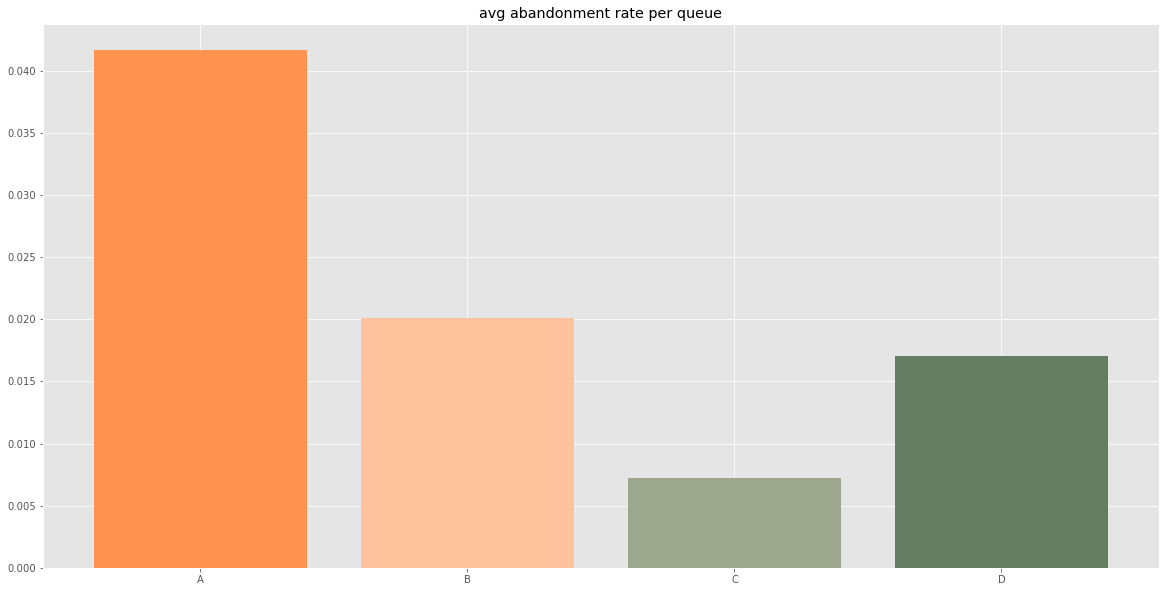

In [108]:
#figured it out here!!!
a_dictionary = abandonment_rates
keys = a_dictionary.keys()
values = a_dictionary.values()
plt.title('avg abandonment rate per queue')
# plt.bar(keys, values)
# extra fun:
plt.bar(keys, values, color=['#FF9350', '#FFC29C', '#9CA78D', '#657E63'])


<AxesSubplot:title={'center':'Service Level % for North Branch'}, xlabel='Rep ID'>

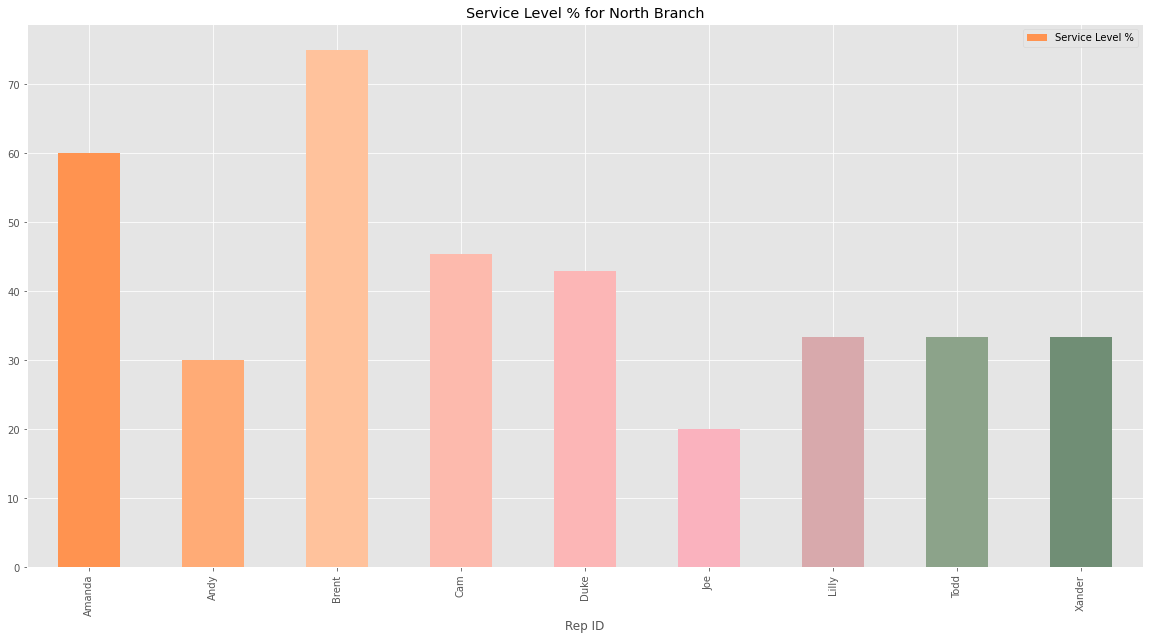

In [87]:

# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#make 4 charts in total for this one, possibly 6 if for entire! north service level % and avg speed per rep.
service_level.plot(y="Service Level %", title = 'Service Level % for North Branch', kind = "bar", color = ['#FF9350','#FFAB76','#FFC29C','#FDBAAD','#FCB6B6','#FAB2BE','#D8A9AC','#8CA38A','#708E75'])

<AxesSubplot:title={'center':'Service Level % for South Branch'}, xlabel='Rep ID'>

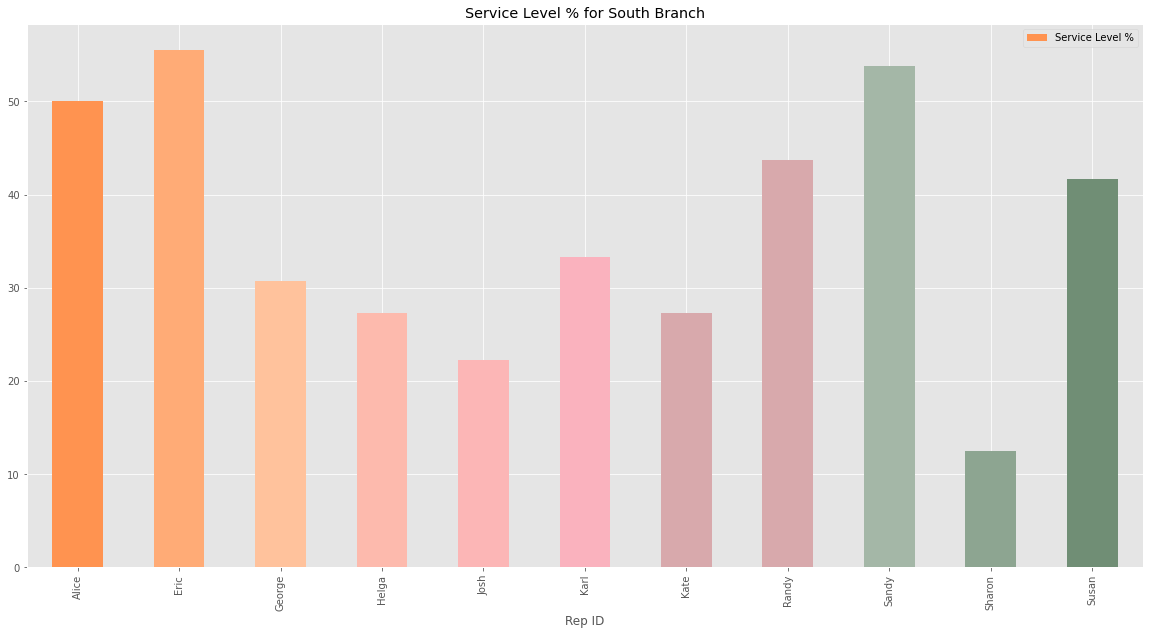

In [130]:

# south_plt contains the data you need for the average speed of answer of each rep

south_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = south_df[south_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = south_df[south_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#make 4 charts in total for this one, possibly 6 if for entire! north service level % and avg speed per rep.
service_level.plot(y="Service Level %", title = 'Service Level % for South Branch', kind = "bar", color = ['#FF9350','#FFAB76','#FFC29C','#FDBAAD','#FCB6B6','#FAB2BE','#D8A9AC','#D8A9AC','#A4B7A7','#8DA591','#708E75'])

<AxesSubplot:title={'center':'Service Level % for Entire Company'}, xlabel='Rep ID'>

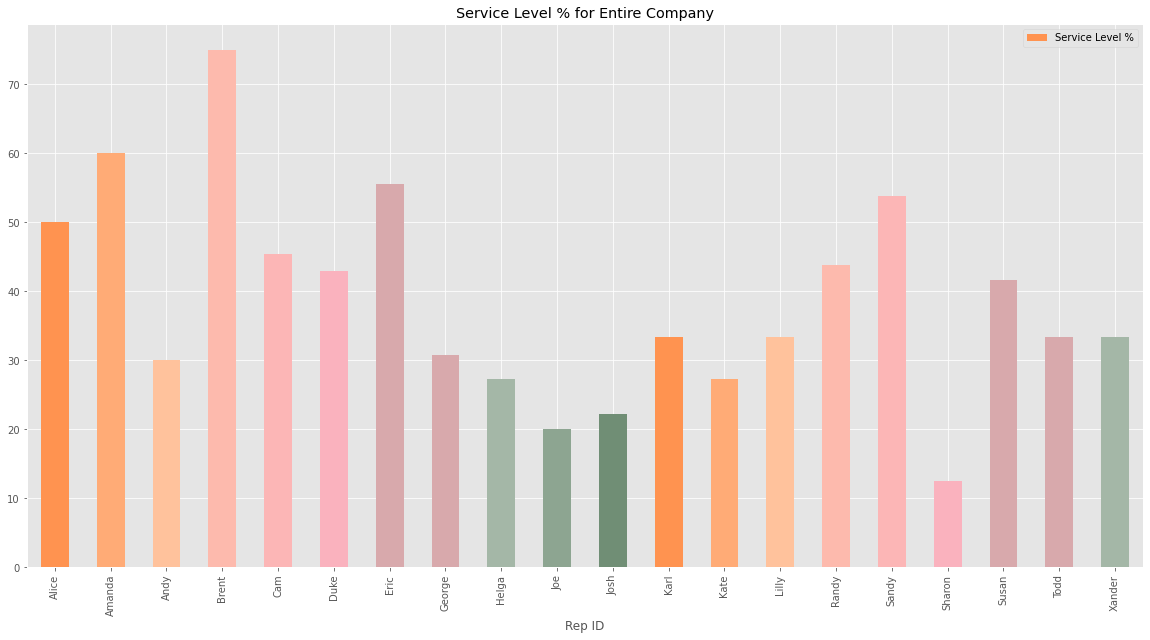

In [129]:

# entire_plt contains the data you need for the average speed of answer of each rep

entire_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#make 4 charts in total for this one, possibly 6 if for entire! north service level % and avg speed per rep.
service_level.plot(y="Service Level %", title = 'Service Level % for Entire Company', kind = "bar", color = ['#FF9350','#FFAB76','#FFC29C','#FDBAAD','#FCB6B6','#FAB2BE','#D8A9AC','#D8A9AC','#A4B7A7','#8DA591','#708E75'])

Text(0, 0.5, 'Seconds')

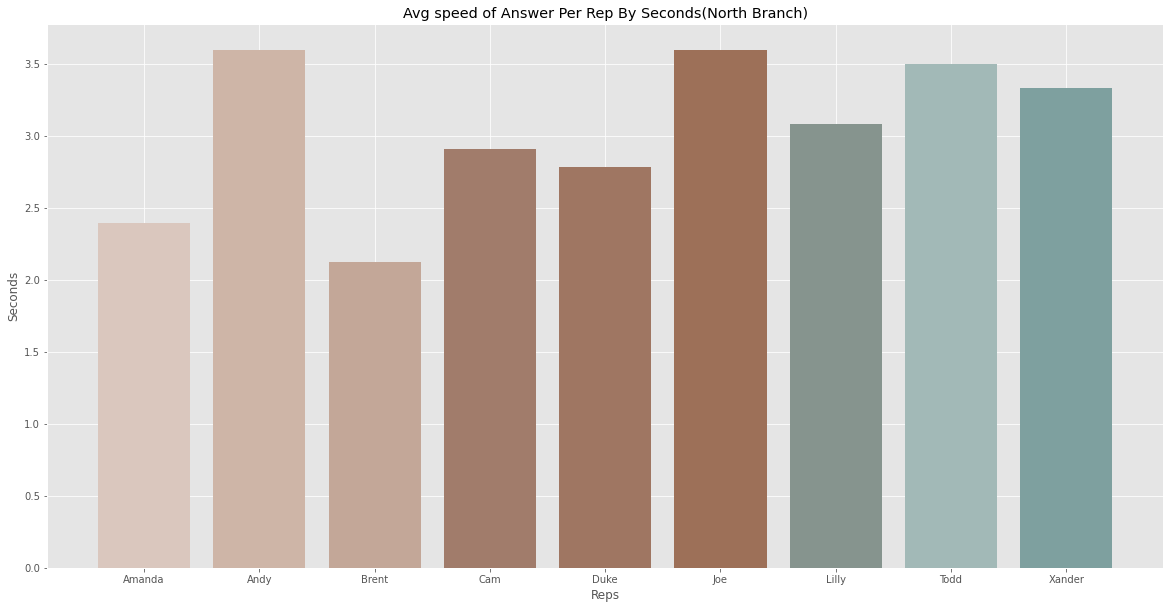

In [112]:
north_df_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(north_df_plt['Rep ID'],north_df_plt["Incoming Wait Time"], color = ['#DAC7BE','#CEB5A7','#C3A798','#A17C6B','#9F7662','#9D7058','#86948E','#A2B9B7','#7EA09F','#5B7B7A','#506867'])
plt.title("Avg speed of Answer Per Rep By Seconds(North Branch)")
plt.xlabel("Reps")
plt.ylabel("Seconds")

Text(0, 0.5, 'Seconds')

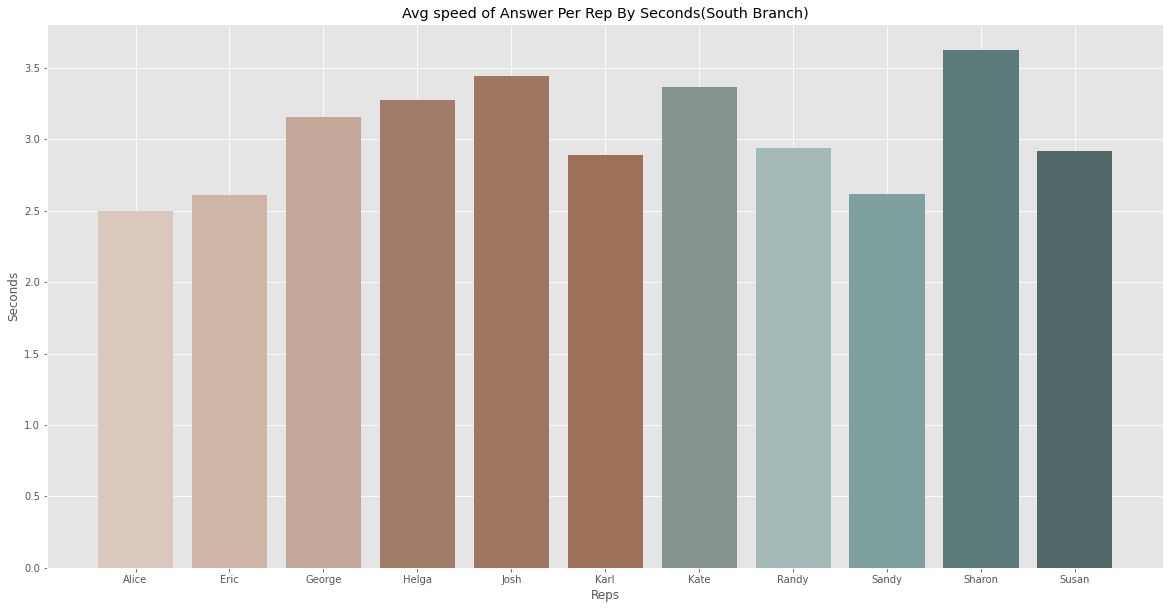

In [113]:
south_df_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(south_df_plt['Rep ID'],south_df_plt["Incoming Wait Time"], color = ['#DAC7BE','#CEB5A7','#C3A798','#A17C6B','#9F7662','#9D7058','#86948E','#A2B9B7','#7EA09F','#5B7B7A','#506867'])
plt.title("Avg speed of Answer Per Rep By Seconds(South Branch)")
plt.xlabel("Reps")
plt.ylabel("Seconds")

Text(0, 0.5, 'Seconds')

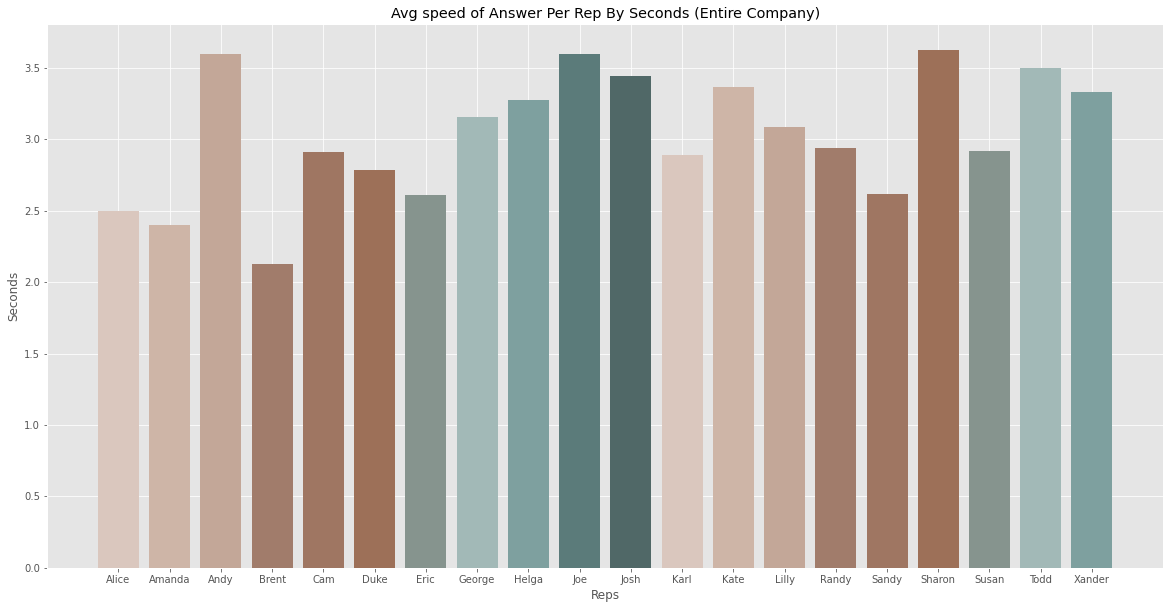

In [111]:
df_plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
plt.bar(df_plt['Rep ID'],df_plt["Incoming Wait Time"], color = ['#DAC7BE','#CEB5A7','#C3A798','#A17C6B','#9F7662','#9D7058','#86948E','#A2B9B7','#7EA09F','#5B7B7A','#506867'])
plt.title("Avg speed of Answer Per Rep By Seconds (Entire Company)")
plt.xlabel("Reps")
plt.ylabel("Seconds")

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


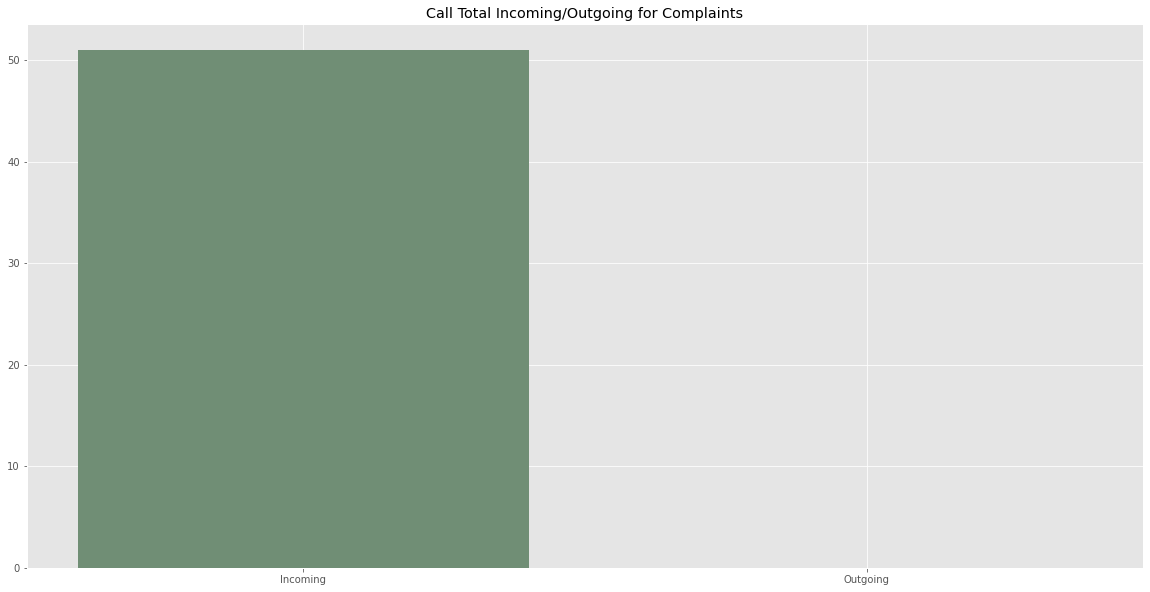

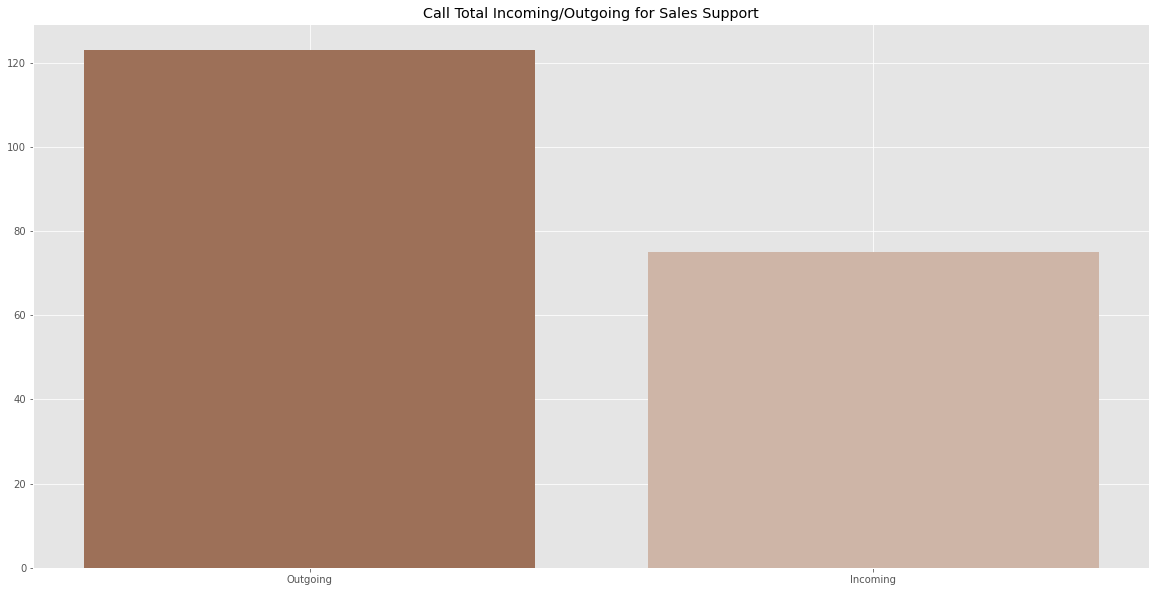

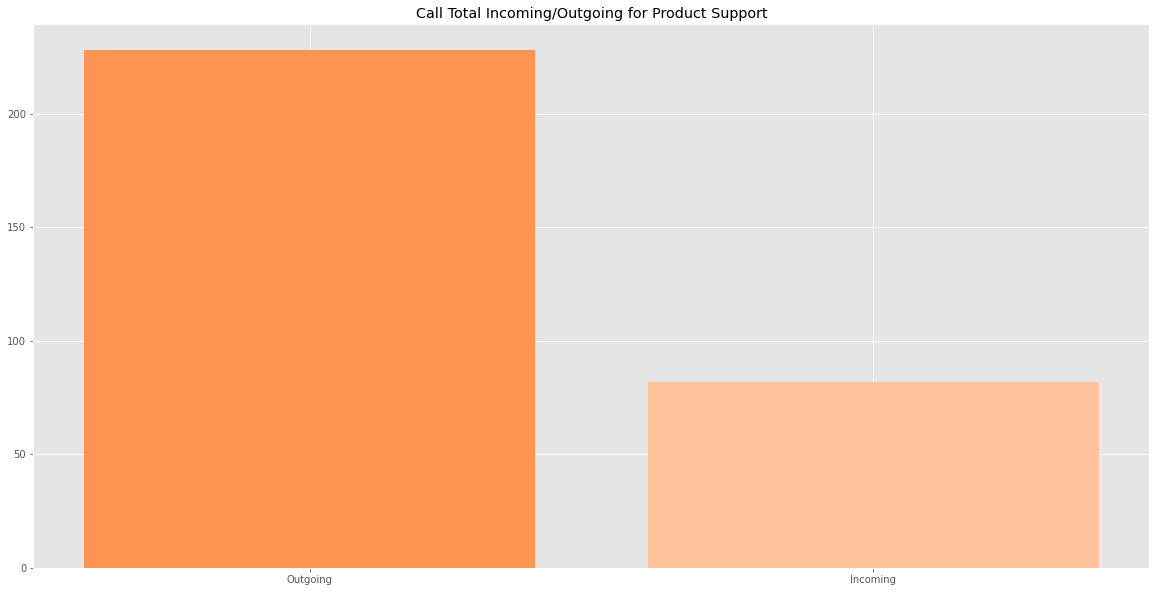

In [116]:
# Create visualization 3 here OUTGOING VS INCOMING
#customer call purpose dictionary
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

outgoing_add = {'Outgoing' : 0}
complaints.update(outgoing_add)
complaints

plt.bar(range(len(complaints)), list(complaints.values()), align = 'center', color = ['#708E75'])
plt.xticks(range(len(complaints)), list(complaints.keys()))
plt.title("Call Total Incoming/Outgoing for Complaints")
plt.show()

plt.bar(range(len(sales_support)), list(sales_support.values()), align = 'center', color = ['#9D7058','#CEB5A7'])
plt.xticks(range(len(sales_support)), list(sales_support.keys()))
plt.title("Call Total Incoming/Outgoing for Sales Support")
plt.show()

plt.bar(range(len(product_support)), list(product_support.values()), align = 'center', color = ['#ff9350', '#FFC29C'])
plt.xticks(range(len(product_support)), list(product_support.keys()))
plt.title("Call Total Incoming/Outgoing for Product Support")
plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

I chose bar charts for all of my vizualizatoins. My reasoning is that the data was very simple and straightforward. I believe the simplicity of the bar chart makes the data easiest to read and understand, especially for anyone coming in without prior knowledge of the data we are working with. 




## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
I believe that the North Branch is running more efficiently. While they have less representatives and comparable answering speed to the South Branch, they have an overall much better service level %. Their call abandoment rate is within the optimal level and their Lost Call metric is at 2%.
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
I believe that the South Brand would benifit from the extra help. I came to this conclusion due to their Lost Call rate is 3.6%. Losing customer calls due to capacity is absolutley one area that I think this company would want to make sure is a priority to fix. The South Branch also get a higher volume of calls, however they close less sales when compared to the North Branch.
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
Ideally I would have loved to figure out a way to use a grouped bar chart for the overall averages between North, South, and Entire Company however I could not figure that out. Would love help if anyone has extra time!

Given more time I might go back through and assign each rep their own color and branch by color scheme throughout the data, so when combined into the overall company charts you could tell who is from which branch.

I would also look into asking the company what calls are priority/give them the most for their company. Are sales truly the goal here or should they be tracking their metrics based on the support they give their customers? Possibly look into grouping employees into sales/support roles based on strengths.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [237]:
# ####TRY 1
# # # Create your visualization here!
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# call_times
# # # Use groupby to plot based on time blocks:
# grouped = call_times.groupby('Time Block').sum().plot.bar()
# grouped
# grouped2 = call_times.groupby('Time Block','Call Purpose').sum().plot.bar()
# grouped.get_group('Complaint')
# # # Use groupby and get_group to select which call purpose to plot:


In [238]:
# ####TRY 2
# # # Create your visualization here!
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# call_times
# # # Use groupby to plot based on time blocks:
# grouped = call_times.groupby('Time Block').sum().plot.bar()

# # # Use groupby and get_group to select which call purpose to plot:

In [322]:
#TRY 3
# call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
# groups = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"])["Calls"].sum()
# groups.plot.bar(color="blue")
# plt.show()

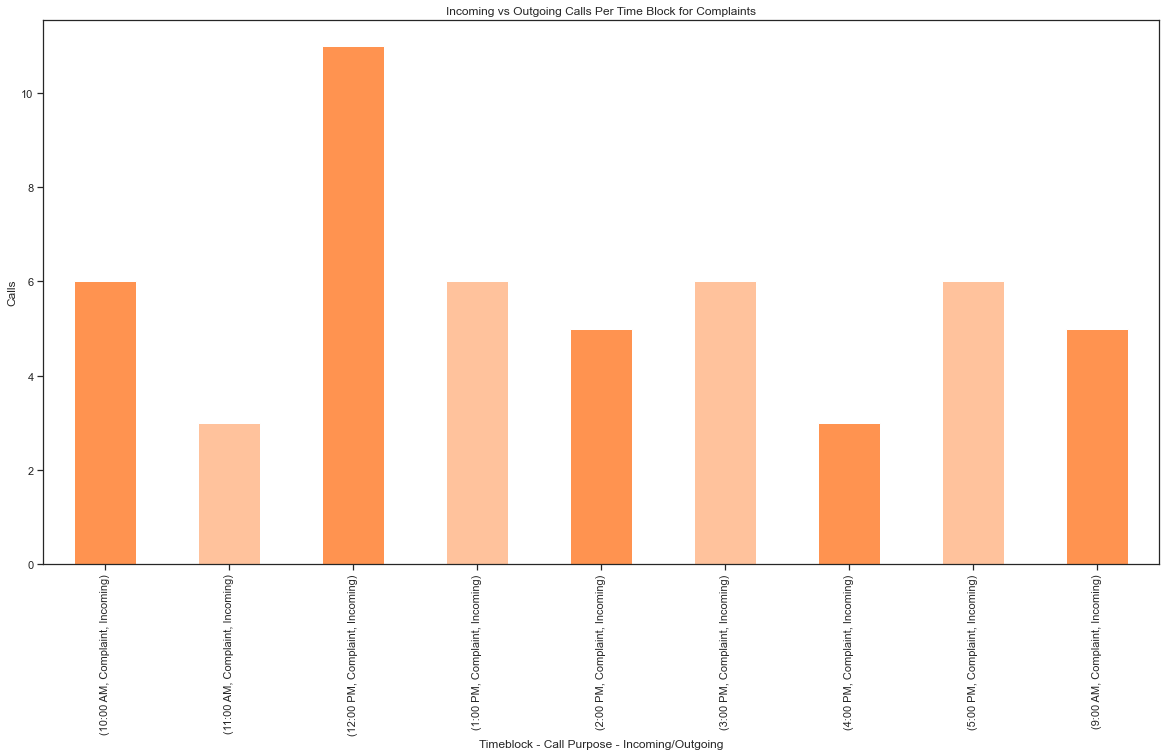

In [333]:
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
groups = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"])["Calls"].sum()
groups.groupby('Call Purpose').get_group('Complaint').plot.bar(color = ['#FF9350','#FFC29C'])
plt.title("Incoming vs Outgoing Calls Per Time Block for Complaints")
plt.xlabel("Timeblock - Call Purpose - Incoming/Outgoing")
plt.ylabel("Calls")

plt.show()

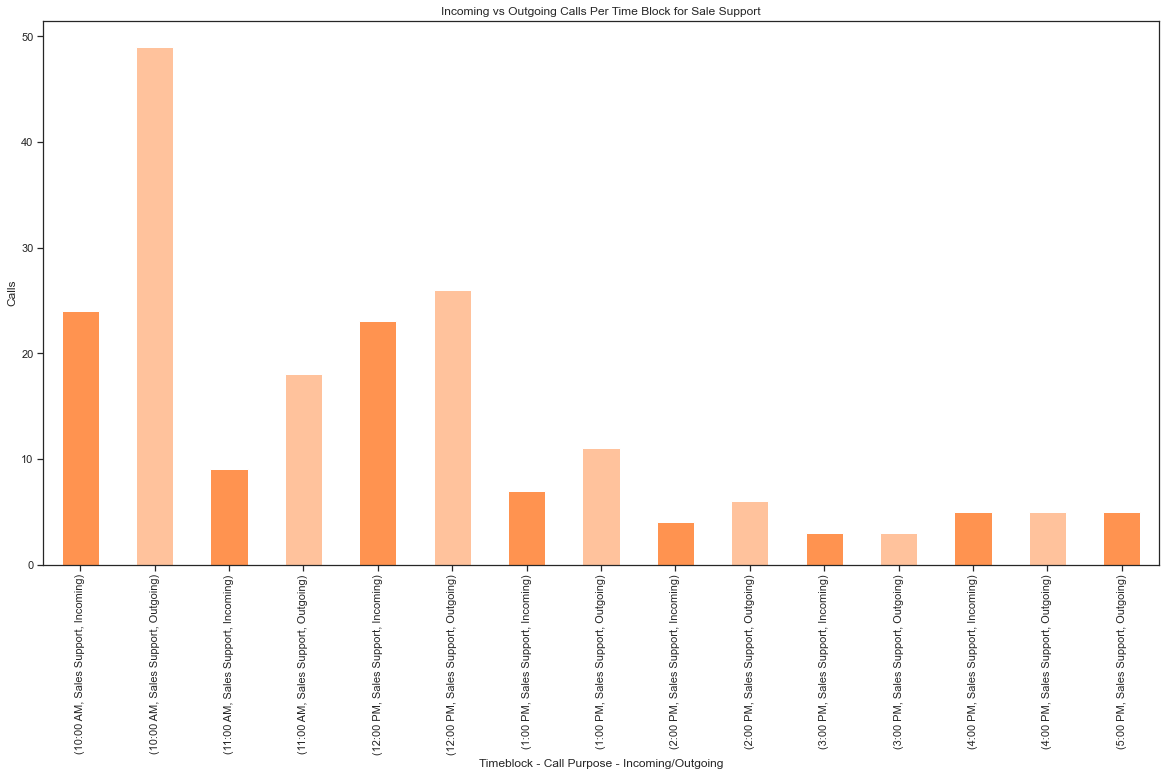

In [334]:
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
groups = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"])["Calls"].sum()
groups.groupby('Call Purpose').get_group('Sales Support').plot.bar(color = ['#FF9350','#FFC29C'])
plt.title("Incoming vs Outgoing Calls Per Time Block for Sale Support")
plt.xlabel("Timeblock - Call Purpose - Incoming/Outgoing")
plt.ylabel("Calls")
plt.show()

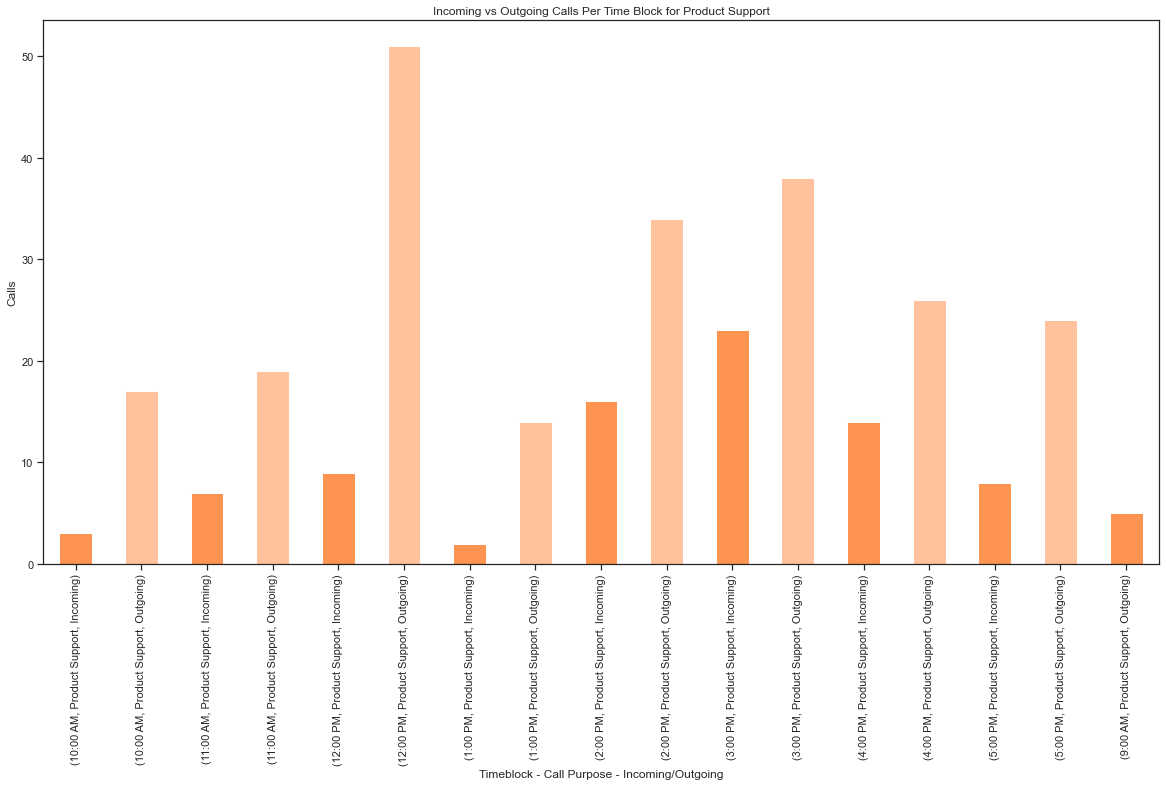

In [335]:
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
groups = call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"])["Calls"].sum()
groups.groupby('Call Purpose').get_group('Product Support').plot.bar(color = ['#FF9350','#FFC29C'])
plt.title("Incoming vs Outgoing Calls Per Time Block for Product Support")
plt.xlabel("Timeblock - Call Purpose - Incoming/Outgoing")
plt.ylabel("Calls")
plt.show()